In [13]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [14]:
os.getcwd()

'/Users/hwankam/ASC'

In [15]:
train = pd.read_csv("./mnist_train.csv")

In [16]:
pd.read_csv("./mnist_test.csv")

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
train.shape

(60000, 785)

In [18]:
X_train = train.iloc[0:10000,1:]

In [19]:
X_train

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#이미지로 보이기 위해서는 배열로 바꾸어 줘야한다. 

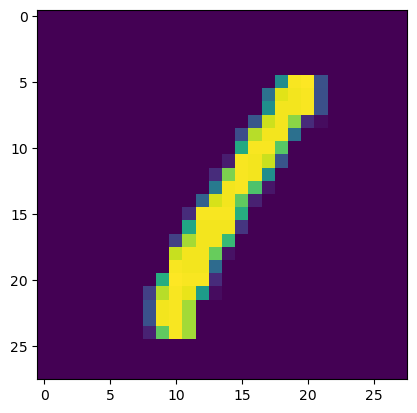

In [20]:
A = X_train.iloc[3]
A_array = np.array(A) 
A_data = A_array.reshape(28,28)
plt.imshow(A_data)
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
X_scaled = scaler.fit_transform(X_train)
X_scaled_T = scaler.fit_transform(np.transpose(X_train))

In [23]:
cov_mat = np.matmul(X_scaled.T, X_scaled)

In [24]:
from scipy.linalg import eigh
values, vectors = eigh(cov_mat, eigvals = (774,783)) # 여기 eigvals에서 Eigenvector를 몇개 쓸지 정한다.

In [25]:
values

array([101445.70057248, 112486.7190506 , 128273.94825691, 139044.86021375,
       158766.14803775, 182041.79049293, 207745.99366805, 272280.73015253,
       293848.17795963, 414834.99478416])

In [26]:
vectors

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## SVD 이후에 고유백터의 일부를 뽑은 V'' 를 사용해 (V'')(V'')^T 를 기존 Design 행렬에 곱해주면 Low rank approx

In [27]:
X_train_trans = np.matmul(np.matmul(vectors,vectors.T),X_scaled.T) 

In [28]:
X_train_trans.shape

(784, 10000)

In [29]:
X_train_trans.T[1].shape

(784,)

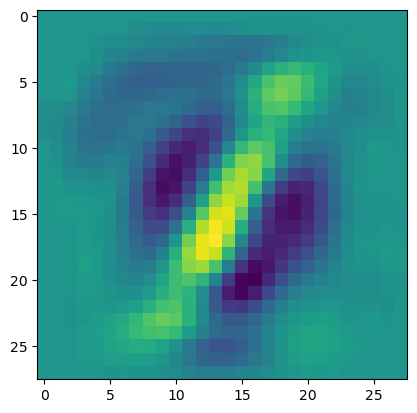

In [30]:
plt.imshow(X_train_trans.T[3].reshape(28,28))
plt.show()

In [31]:
from scipy.linalg import eigh
values2, vectors2 = eigh(cov_mat, eigvals = (683,783)) # 여기 eigvals에서 Eigenvector를 몇개 쓸지 정한다.

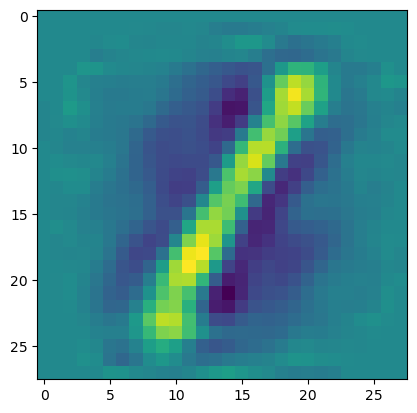

In [32]:
X_train_trans2 = np.matmul(np.matmul(vectors2,vectors2.T),X_scaled.T)
plt.imshow(X_train_trans2.T[3].reshape(28,28))
plt.show()

In [33]:
from scipy.linalg import eigh
values3, vectors3 = eigh(cov_mat, eigvals = (583,783)) # 여기 eigvals에서 Eigenvector를 몇개 쓸지 정한다.

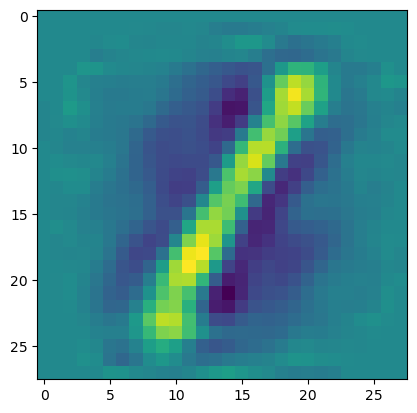

In [34]:
X_train_trans3 = np.matmul(np.matmul(vectors3,vectors3.T),X_scaled.T)
plt.imshow(X_train_trans2.T[3].reshape(28,28))
plt.show()

## 아래는 pc score의 분산값의 비율을 그림으로 표현한 것이다

In [39]:
from sklearn.decomposition import PCA

In [42]:
pca=PCA(n_components=784)

In [43]:
#pca=decomposition.PCA()
#pca.n_components = 784
pca_data = pca.fit_transform(X_scaled)

In [44]:
per = pca.explained_variance_ / np.sum(pca.explained_variance_ )

In [45]:
cum_var = np.cumsum(per)

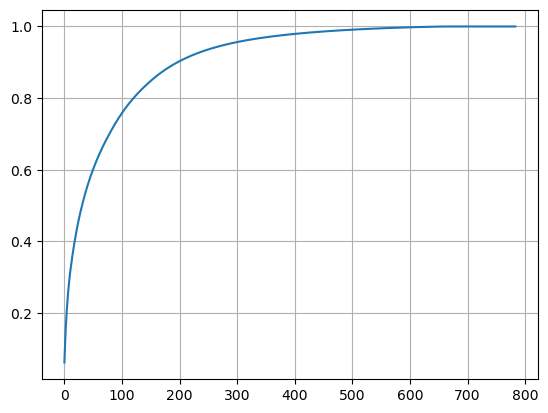

In [46]:
plt.plot(cum_var)
plt.grid()
plt.show()

## 아래는 텐서플로우내에 존재하는 원본데이터 형식에서 그림을 추출해내는 코드이다.

In [14]:
from keras.datasets import mnist

Using TensorFlow backend.


In [15]:
import tensorflow as tf

In [85]:
mnist = tf.keras.datasets.mnist.load_data()

In [93]:
#mnist 데이터는 Minst[0] 이 train data 이고 mnist[1]이 test data이다. 
train_x = mnist[0][0]

In [94]:
train_x.shape

(60000, 28, 28)

In [97]:
train_x[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

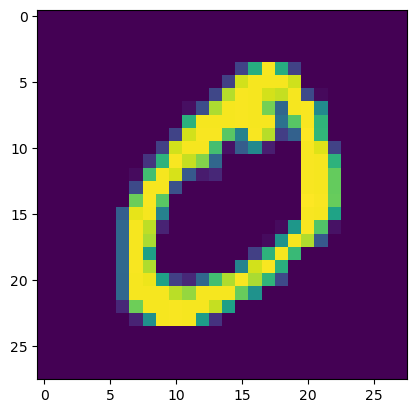

In [96]:
plt.imshow(train_x[1])
plt.show()